# Synthetic Financial Datasets For Fraud Detection - Synthetic datasets generated by the PaySim mobile money simulator

## Information about this notebook
### Source
This notebook aims to explore, gain insights, and solve the problems related to the data sets located in the following source:
- https://www.kaggle.com/ntnu-testimon/paysim1

### Data
This notebook depends on the following data files:
- PS_20174392719_1491204439457_log.csv

### References
The content of this notebook is based on knowledge gained from the following resources:
- https://www.kaggle.com/arjunjoshua/predicting-fraud-in-financial-payment-services

### Status
- The content of this notebook mainly follows the lines of the reference given above.
- ML part in the end is still to be done.

## Introduction
### Description
#### Context
There is a lack of public available datasets on financial services and specially in the emerging mobile money transactions domain. Financial datasets are important to many researchers and in particular to us performing research in the domain of fraud detection. Part of the problem is the intrinsically private nature of financial transactions, that leads to no publicly available datasets.
<br>
We present a synthetic dataset generated using the simulator called PaySim as an approach to such a problem. PaySim uses aggregated data from the private dataset to generate a synthetic dataset that resembles the normal operation of transactions and injects malicious behaviour to later evaluate the performance of fraud detection methods.

#### Content
PaySim simulates mobile money transactions based on a sample of real transactions extracted from one month of financial logs from a mobile money service implemented in an African country. The original logs were provided by a multinational company, who is the provider of the mobile financial service which is currently running in more than 14 countries all around the world.
<br>
This synthetic dataset is scaled down 1/4 of the original dataset and it is created just for Kaggle.

## Imports

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show math plots inline
%matplotlib inline

# Import data set
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

# Correct spelling of features
df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig',
                        'newbalanceOrig':'newBalanceOrig',
                        'oldbalanceDest':'oldBalanceDest',
                        'newbalanceDest':'newBalanceDest'})

## Exploratory data analysis

In [73]:
# Describe data
print('Data set dimenionality: {}'.format(df.shape))
print('Data set has missing values: {}'.format(df.isnull().values.any()))
print('Data frame preview:')
df.head()

Data set dimenionality: (6362620, 11)
Data set has missing values: False
Data frame preview:


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Features
(**Name** : *description*)
<br>
**step** : *Maps a unit of time in the real world. In this case 1 step is 1 hour of time.* - Total steps 744 (30 days simulation).
<br>
**type** : *CASH_IN, CASH_OUT, DEBIT, PAYMENT and TRANSFER*
<br>
**amount** : *amount of the transaction in local currency*
<br>
**nameOrig** : *customer who started the transaction*
<br>
**oldBalanceOrig** : *initial balance before the transaction*
<br>
**newBalanceOrig** : *customer's balance after the transaction.*
<br>
**nameDest** : *recipient ID of the transaction.*
<br>
**oldBalanceDest** : *initial recipient balance before the transaction.* - Note that there is not information for customers that start with M (Merchants).
<br>
**newBalanceDest** : *recipient's balance after the transaction.* - Note that there is not information for customers that start with M (Merchants).
<br>
**isFraud** : *identifies a fraudulent transaction (1) and non fraudulent (0)* - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.)
<br>
**isFlaggedFraud** : *flags illegal attempts to transfer more than 200.000 in a single transaction.* - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [74]:
# TODO: Plot data distrubution (unbalanced data)
# TODO: Count number of transaction between accounts

We have the following number of transactions:

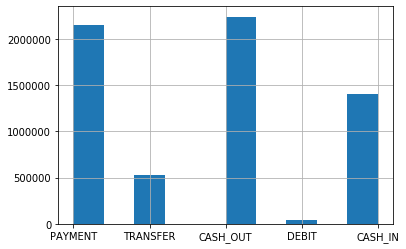

In [75]:
df.type.hist()

### Overview of fraudulent transactions
#### Types of fraudulent transactions
We have the following types of fraudulent transactions:

In [76]:
df_fraud = df.loc[df.isFraud == 1]
fraud_types = df_fraud.type.drop_duplicates().values
for type in fraud_types:
    df_ = df_fraud.loc[df_fraud.type == type]
    print('{} in {}'.format(len(df_), type))

4097 in TRANSFER
4116 in CASH_OUT


#### Flagged fraudulent transactions

We know that a transaction should be flagged as fraudulent, if the transaction is of type 'TRANSFER' and the amount is above 200.000. Indeed, we have:

In [77]:
df_flagged = df.loc[df.isFlaggedFraud == 1]
print('Types of transactions flagged as fraudulent: {}, where the minimum amount transacted is: {}'.format(df_flagged.type.drop_duplicates().values, df_flagged.amount.min()))

Types of transactions flagged as fraudulent: ['TRANSFER'], where the minimum amount transacted is: 353874.22


Note that transaction that are flagged are not executed:

In [78]:
df_flagged[['amount', 'nameOrig', 'oldBalanceOrig', 'newBalanceOrig', 'oldBalanceDest', 'newBalanceDest']].head()

,amount,nameOrig,oldBalanceOrig,newBalanceOrig,oldBalanceDest,newBalanceDest
2736446,4953893.08,C728984460,4953893.08,4953893.08,0.0,0.0
3247297,1343002.08,C1100582606,1343002.08,1343002.08,0.0,0.0
3760288,536624.41,C1035541766,536624.41,536624.41,0.0,0.0
5563713,4892193.09,C908544136,4892193.09,4892193.09,0.0,0.0
5996407,10000000.00,C689608084,19585040.37,19585040.37,0.0,0.0


That is, if the transaction is flagged as fraud, then oldBalanceDest = newBalanceDest. However, oldBalanceDest = newBalanceDest does not imply that the transaction is flagged as fraud:

In [79]:
df[df.oldBalanceDest == df.newBalanceDest][df.type == 'TRANSFER'].head()

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.0,0.0,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.0,0.0,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.0,0.0,1,0
969,1,TRANSFER,1277212.77,C1334405552,1277212.77,0.0,C431687661,0.0,0.0,1,0
1115,1,TRANSFER,35063.63,C1364127192,35063.63,0.0,C1136419747,0.0,0.0,1,0


TODO: Since all transactions are fraudulent, does the above agrument contribute to anything???

TODO: Delete transactions where amount > oldBalanceOrig in data cleaning section???

In [80]:
len(df[df.oldBalanceDest == df.newBalanceDest][df.type == 'TRANSFER'])

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4174

In [81]:
len(df[df.oldBalanceDest == df.newBalanceDest][df.type == 'TRANSFER'][df.isFraud == 1])

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4068

In [82]:
df[df.oldBalanceDest == df.newBalanceDest][df.type == 'TRANSFER'][df.isFraud != 1]

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
1248,1,TRANSFER,271161.74,C1658487789,0.0,0.00,C1219161283,0.0,0.0,0,0
13105,7,TRANSFER,89659.74,C1397283620,17424.0,0.00,C1002031672,0.0,0.0,0,0
15398,8,TRANSFER,741192.56,C112345235,33238.0,0.00,C701279123,0.0,0.0,0,0
17664,8,TRANSFER,92338.97,C1282310120,41121.0,0.00,C382431057,0.0,0.0,0,0
19549,8,TRANSFER,57296.77,C2147266720,30810.0,0.00,C1941371857,0.0,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
3847410,282,TRANSFER,143153.11,C1935319409,539453.0,396299.89,C534571065,0.0,0.0,0,0
3892845,284,TRANSFER,2407.35,C1298124902,11881.0,9473.65,C2132038988,0.0,0.0,0,0
4221197,306,TRANSFER,305721.60,C1586414482,273878.0,0.00,C850825730,0.0,0.0,0,0
4689795,331,TRANSFER,146233.88,C236411357,209.0,0.00,C1447547990,0.0,0.0,0,0


In [83]:
len(df[df.isFraud == 1][df.type == 'TRANSFER'])

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


4097

TODO: Delete transactions where amount > oldBalanceOrig in data cleaning section???

Now, all accounts which have a flagged transaction is only registered with one transaction - the flagged one. They have neither sendt of recieved any other transactions.

In [84]:
df_not_flagged = df.loc[df.isFlaggedFraud == 0]
ser_flagged_acc = df_flagged.nameOrig # Series with flagged accounts

ser_flagged_acc.isin(pd.concat([df_not_flagged.nameOrig,
                                df_not_flagged.nameDest])).any()

False

However, this is not true for destination accounts:

In [85]:
print('{} of the destination accounts - under flagged transactions - have initiated other transactions.'.format(sum(df_flagged.nameDest.isin(df_not_flagged.nameOrig))))
print('{} of the destination accounts - under flagged transactions - have recieved other transactions.'.format(sum(df_flagged.nameDest.isin(df_not_flagged.nameDest))))

0 of the destination accounts - under flagged transactions - have initiated other transactions.
2 of the destination accounts - under flagged transactions - have recieved other transactions.


More specifically, we have the following transactions:

In [86]:
ser_ = df_not_flagged.nameDest.isin(df_flagged.nameDest) # Returns a series of booleans
inds = ser_[ser_ == True].index
df_ = df.iloc[inds]
df_

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
2854045,227,TRANSFER,760102.98,C1849800539,4050.00,0.00,C639921569,0.00,760102.98,0,0
3624889,274,CASH_IN,244597.73,C2127246739,8122859.99,8367457.72,C639921569,760102.98,515505.26,0,0
3812008,281,CASH_OUT,378860.57,C2043953867,637.00,0.00,C639921569,515505.26,894365.83,0,0
4265006,307,CASH_OUT,57467.33,C1001354003,5890.00,0.00,C639921569,894365.83,951833.16,0,0
4913476,349,CASH_OUT,159055.39,C1785841517,229.00,0.00,C639921569,951833.16,1110888.56,0,0
5048525,354,CASH_IN,122544.92,C1422777798,194.00,122738.92,C639921569,1110888.56,988343.63,0,0
5810706,401,CASH_OUT,31932.50,C1621471540,102191.00,70258.50,C1147517658,0.00,31932.50,0,0
6205345,586,CASH_IN,389744.76,C1080609672,671920.61,1061665.37,C639921569,988343.63,598598.87,0,0


where

In [87]:
gb = df_.groupby(df_.nameDest)
for group in gb.groups:
    df_g = gb.get_group(group)
    print('- {} have {} non-flagged transaction(s) from {}'.format(group, len(df_g), df_g.nameOrig.values))

- C1147517658 have 1 non-flagged transaction(s) from ['C1621471540']
- C639921569 have 7 non-flagged transaction(s) from ['C1849800539' 'C2127246739' 'C2043953867' 'C1001354003' 'C1785841517'
 'C1422777798' 'C1080609672']


TODO: Note that amount > oldBalanceOrig in transactions 2854045, 3812008, 4265006, and 4913476. How can this be? This also result in newBalanceOrig = 0 in these transactions. This needs further investigation.


Conclusion: Although isFraud is always set when isFlaggedFraud is set, since isFlaggedFraud is set just 16 times in a seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing information.

#### Common factors of fraudulent transactions

As we noted above, the two classes of fradulent transactions consists of TRANSFER and CASH_OUT. We will now see if there is any common factors in these types of transactions.

From the data description, the modus operandi for committing fraud involves first making a TRANSFER to a (fraudulent) account which in turn conducts a CASH_OUT. CASH_OUT involves transacting with a merchant who pays out cash. Thus, within this two-step process, the fraudulent account would be both, the destination in a TRANSFER and the originator in a CASH_OUT.

##### Linking between TRANSFER and CASH_OUT?
If a CASH_OUT transaction is classified as fraudulent, and the originator of that transaction has been the destination of TRANSFERs, are those TRANSFER transactions considered fraudulent?

In [88]:
df_fraud_cashout = df[df.isFraud == 1][df.type == 'CASH_OUT']
df_transfer = df[df.type == 'TRANSFER']

df_transfer.nameDest.isin(df_fraud_cashout.nameOrig).any()

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


False

This shows that no money where transferred to accounts that have executed a fradulent CASH_OUT transaction.

Now, could destination accounts for fraudulent TRANSFERs originate CASHOUTs that are not considered fraudulent?

In [89]:
df_fraudulent_transfer = df_transfer[df_transfer.isFraud == 1]
df_not_fraud = df[df.isFraud == 0]
df_ = df_fraudulent_transfer.loc[df_fraudulent_transfer.nameDest.isin(df_not_fraud.loc[df_not_fraud.type == 'CASH_OUT'].nameOrig)]
df_.head()

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
1030443,65,TRANSFER,1282971.57,C1175896731,1282971.57,0.0,C1714931087,0.0,0.0,1,0
6039814,486,TRANSFER,214793.32,C2140495649,214793.32,0.0,C423543548,0.0,0.0,1,0
6362556,738,TRANSFER,814689.88,C2029041842,814689.88,0.0,C1023330867,0.0,0.0,1,0


In [90]:
df[df.type == 'CASH_OUT'].loc[df.nameOrig.isin(df_.nameDest)]

,step,type,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud
1168398,132,CASH_OUT,29084.28,C1023330867,51999.0,22914.72,C1422447255,0.00,29084.28,0,0
2186261,185,CASH_OUT,214555.85,C423543548,0.0,0.00,C1066927674,4575179.83,4789735.69,0,0
6149940,546,CASH_OUT,18091.05,C1714931087,197227.0,179135.95,C1339132632,66177.84,84268.89,0,0


AS we can see, only C1714931087 recieved cash and performed a cash out later. For the other accounts, CASH_OUTs where performed before the transfer took place.

#### Fraudulent transactions
It looks like the majority of fraudulent transactions emptys the originators account:

In [91]:
n_0 = len(df_fraud)
n_1 = len(df_fraud[df.newBalanceOrig == 0.0])
n_2= len(df_fraud[df.newBalanceOrig != 0.0])
print('Within the {} fraudulent transactions, {} emptied the originator\'s account, whereas {} still had some balance above 0'.format(n_0, n_1, n_2))

Within the 8213 fraudulent transactions, 8053 emptied the originator's account, whereas 160 still had some balance above 0


C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


## Data cleaning
### Irrelevant features
From the exploratory data analysis (EDA) of section 2, we know that fraud only occurs in 'TRANSFER's and 'CASH_OUT's. So we assemble only the corresponding data in X for analysis.

In [92]:
X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')] # Returns df with TRANSFER and CASH_OUT transactions

In [93]:
# Separate feature data from target lable
y = X.isFraud
X.drop(columns=['isFraud'], inplace=True)

# TODO: can use del X['isFraud'] instead of X.drop(columns=['isFraud'], inplace=True)???
# Yep! Note that del X.isFraud does not work, even though del X['isFraud'] ~ X['isFraud']

# Remove irrelevant data (ref. EDA)
X.drop(columns=['nameOrig', 'nameDest', 'isFlaggedFraud'], inplace=True)

C:\Users\e218560\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [94]:
# Set binary label for transactions type to save memory under computations
code_TRANSFER = 0
code_CASH_OUT = 1
X.loc[X.type == 'TRANSFER', 'type'] = code_TRANSFER
X.loc[X.type == 'CASH_OUT', 'type'] = code_CASH_OUT
X.type = X.type.astype(int) # Sets dtype to int

C:\Users\e218560\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\e218560\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


### Inconsistent feature data

Several transactions have zero balances in the destination account both before and after a non-zero amount is transacted. We will now see that the fraction of such transactions is much larger in fraudulent transactions:

In [95]:
# Separate fraudulent from genuine transactions
X_fraud = X.loc[y==1]
X_not_fraud = X.loc[y==0]

X_fraud_inc = X_fraud.loc[(X_fraud.oldBalanceDest == 0) & (X_fraud.newBalanceDest == 0) & (X_fraud.amount != 0)]
X_not_fraud_inc = X_not_fraud.loc[(X_not_fraud.oldBalanceDest == 0) & (X_not_fraud.newBalanceDest == 0) & (X_not_fraud.amount != 0)]

print('{:.2f}% of fraudulent transactions has inconsistent transaction data'.format(100*len(X_fraud_inc)/len(X_fraud)))
print('{:.2f}% of genuine transactions has inconsistent transaction data'.format(100*len(X_not_fraud_inc)/len(X_not_fraud)))

49.56% of fraudulent transactions has inconsistent transaction data
0.06% of genuine transactions has inconsistent transaction data


Thus we note that the destination account balances being zero, is a strong indicator of fraud. We note this inconsistency by replaceing 0 with -1 for these features. This will help a suitible ML algorithm to detect fraud.

In [96]:
# Mark inconsistency of destination account balances
X.loc[(X.oldBalanceDest == 0) & (X.newBalanceDest == 0) & (X.amount != 0), ['oldBalanceDest', 'newBalanceDest']] = - 1

In a similar mannar, we have zero balances in the originating account both before and after a non-zero amount is transacted. However, the fraction of such transactions is much smaller in fraudulent compared to genuine transactions:

In [97]:
X_fraud_inc_ = X_fraud.loc[(X_fraud.oldBalanceOrig == 0) & (X_fraud.newBalanceOrig == 0) & (X_fraud.amount != 0)]
X_not_fraud_inc_ = X_not_fraud.loc[(X_not_fraud.oldBalanceOrig == 0) & (X_not_fraud.newBalanceOrig == 0) & (X_not_fraud.amount != 0)]

print('{:.2f}% of fraudulent transactions has inconsistent transaction data'.format(100*len(X_fraud_inc_)/len(X_fraud)))
print('{:.2f}% of genuine transactions has inconsistent transaction data'.format(100*len(X_not_fraud_inc_)/len(X_not_fraud)))

0.30% of fraudulent transactions has inconsistent transaction data
47.37% of genuine transactions has inconsistent transaction data


Once again, from similar reasoning as above, instead of imputing a numerical value we replace the value of 0 with a NaN.

In [98]:
# Noting inconsistency in data
X.loc[(X.oldBalanceOrig == 0) & (X.newBalanceOrig == 0) & (X.amount != 0), ['oldBalanceOrig', 'newBalanceOrig']] = np.nan

## Feature engineering
AS noted above, the zero-balances could act as a differentiator between fraudulent and genuine transactions. With this in mind, we create 2 new features that measures the difference between the originating and destination accounts for each transaction.

In [99]:
X['diffBalanceOrig'] = X.newBalanceOrig + X.amount - X.oldBalanceOrig
X['diffBalanceDest'] = X.oldBalanceDest + X.amount - X.newBalanceDest

C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\e218560\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Note: these new features will turn out to be important in obtaining the best performance of the ML algorithm that we will select in the end.

In [100]:
# Update class matrices
X_fraud = X.loc[y==1]
X_not_fraud = X.loc[y==0]

## Data visualization
The best way see if the data contains enough information such that a ML algorithm can make strong predictions, is by trying to visualize the differences between fraudulent and genuine transactions.

In [102]:
def plotStrip(X, y, hue, figsize = (14, 9)):
    
    fig = plt.figure(figsize = figsize)
    colours = plt.cm.tab10(np.linspace(0, 1, 9))
    with sns.axes_style('ticks'):
        ax = sns.stripplot(X, y, hue = hue, jitter = 0.4, marker = '.', size = 4, palette = colours)
        ax.set_xlabel('')
        ax.set_xticklabels(['Genuine', 'Fraudulent'], size = 16)
        for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)

        handles, labels = ax.get_legend_handles_labels()
        plt.legend(handles, ['TRANSFER', 'CASH_OUT'], bbox_to_anchor=(1, 1), loc=2, borderaxespad=0,
                   fontsize = 16);
    return ax

Note that the the width of each 'fingerprint' is set by the 'jitter' parameter in the plotStrip function above which attempts to separate out and plot transactions occuring at the same time with different abscissae.

### Distribution of trasactions over time

In [103]:
# Number of data points
n = len(X)

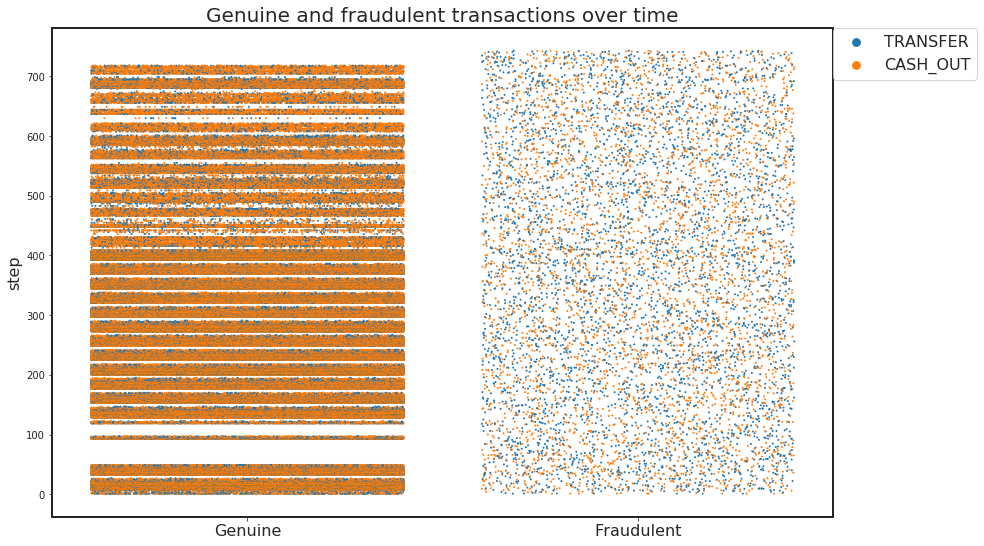

In [104]:
ax = plotStrip(y[:n], X.step[:n], X.type[:n])
ax.set_ylabel('step', size = 16)
ax.set_title('Genuine and fraudulent transactions over time', size = 20);

The plot above shows how the fraudulent and genuine transactions distributes over time. It is clear that fradulent transactions are more homogenously distributed over time compared to genuine transactions. We also note that CASH_OUTs outnumber TRANSFERs in genuine transactions, in contrast to a balanced distribution between them in fraudulent transactions.

### Distribution of transactions by amount

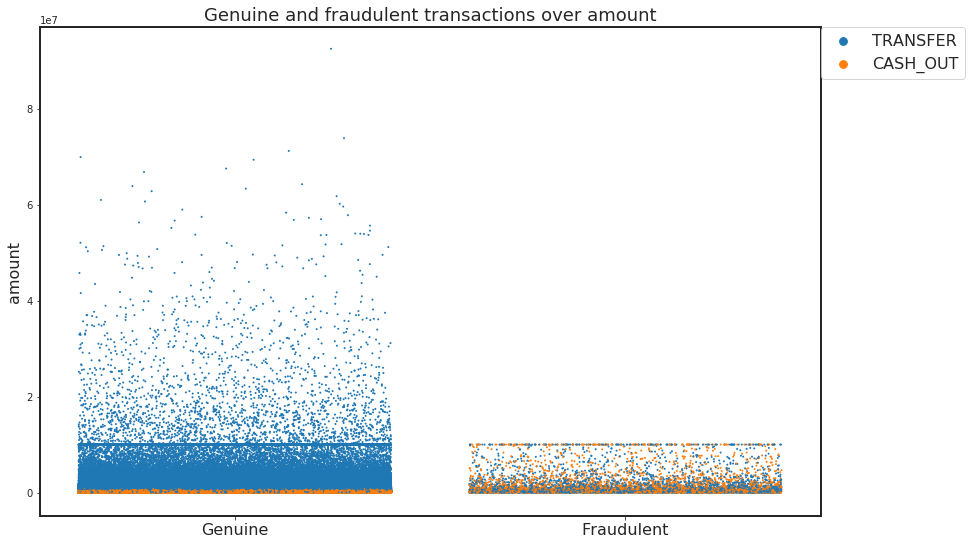

In [105]:
ax = plotStrip(y[:n], X.amount[:n], X.type[:n])
ax.set_ylabel('amount', size = 16)
ax.set_title('Genuine and fraudulent transactions over amount', size = 18);

Clearly, we see that the maximum amount for a fraudulent transaction is:

In [106]:
print('Max = {}'.format(df_fraud.amount.max()))

Max = 10000000.0


The plot above doesn't yield too much information on how to separate genuine from fraudulent transactions. Now, recall the the 2 new features that measures the difference between the originating and destination accounts for each transaction (See: freature engineering):

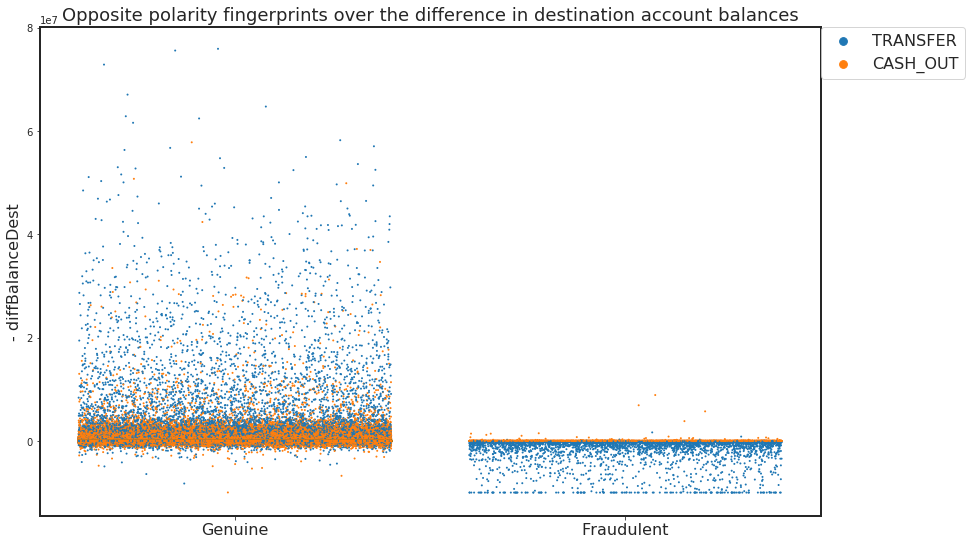

In [107]:
ax = plotStrip(y[:n], - X.diffBalanceDest[:n], X.type[:n])
ax.set_ylabel('- diffBalanceDest', size = 16)
ax.set_title('Opposite polarity fingerprints over the difference in destination account balances', size = 18);

The plot above tells a different story. The new feature diffBalanceDest is pretty effective at making a distinction between genuine and fraudulent transactions.

For diffBalanceOrig we have the following plot:

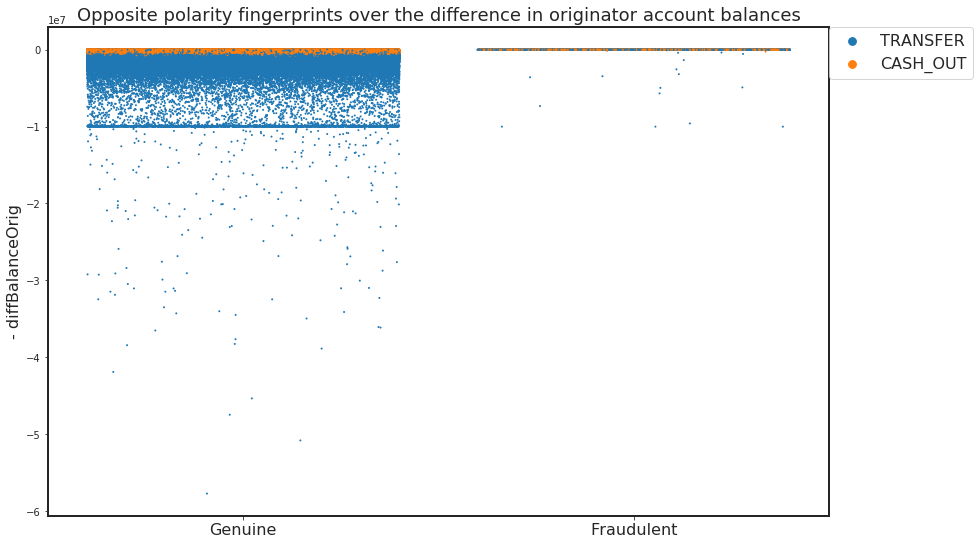

In [108]:
ax = plotStrip(y[:n], - X.diffBalanceOrig[:n], X.type[:n])
ax.set_ylabel('- diffBalanceOrig', size = 16)
ax.set_title('Opposite polarity fingerprints over the difference in originator account balances', size = 18);

Finally, let ut examine the correlation betweeen the features in genuine and fraudulent transactions by plotting a heat map:

[Text(1, -1.0, '−1.0'),
 Text(1, -0.5, '−0.5'),
 Text(1, 0.0, '0.0'),
 Text(1, 0.5, '0.5'),
 Text(1, 1.0, '1.0')]

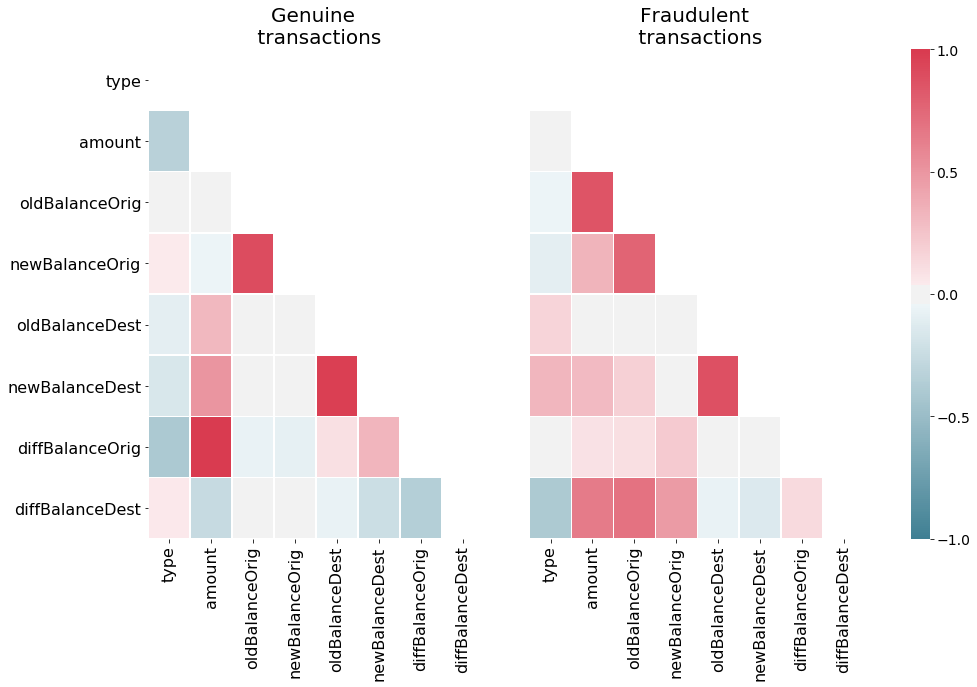

In [67]:
df_corr_not_fraud = X_not_fraud.loc[:, X.columns != 'step'].corr()
mask = np.zeros_like(df_corr_not_fraud)
indices = np.triu_indices_from(df_corr_not_fraud)
mask[indices] = True

grid_kws = {"width_ratios": (.9, .9, .05), "wspace": 0.2}
f, (ax1, ax2, cbar_ax) = plt.subplots(1, 3, gridspec_kw=grid_kws, figsize = (14, 9))

cmap = sns.diverging_palette(220, 8, as_cmap=True)
ax1 = sns.heatmap(df_corr_not_fraud, ax = ax1, vmin = -1, vmax = 1, cmap = cmap, square = False, linewidths = 0.5, mask = mask, cbar = False)
ax1.set_xticklabels(ax1.get_xticklabels(), size = 16)
ax1.set_yticklabels(ax1.get_yticklabels(), size = 16) 
ax1.set_title('Genuine \n transactions', size = 20)

df_corr_fraud = X_fraud.loc[:, X.columns != 'step'].corr()
ax2 = sns.heatmap(df_corr_fraud, vmin = -1, vmax = 1, cmap = cmap, ax = ax2, square = False, linewidths = 0.5, mask = mask, yticklabels = False,
                  cbar_ax = cbar_ax, cbar_kws={'orientation': 'vertical', 'ticks': [-1, -0.5, 0, 0.5, 1]})
ax2.set_xticklabels(ax2.get_xticklabels(), size = 16)
ax2.set_title('Fraudulent \n transactions', size = 20)

cbar_ax.set_yticklabels(cbar_ax.get_yticklabels(), size = 14)

# Machine Learning Insights

In [68]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.metrics import average_precision_score
from xgboost.sklearn import XGBClassifier
from xgboost import plot_importance, to_graphviz

## Detecting fraud in imbalanced data
Having obtained evidence from the plots above that the data now contains features that make fraudulent transactions clearly detectable, the remaining obstacle for training a robust ML model is the highly imbalanced nature of the data.

In [54]:
print('{:.2f}% of transactions are not fraudulent.'.format(100*len(X_not_fraud)/len(X)))

99.70% of transactions are not fraudulent.


### Selection of ML algorithm:
A first approach to deal with imbalanced data is to balance it by discarding the majority class before applying an ML algorithm. The disadvantage of undersampling is that a model trained in this way will not perform well on real-world skewed test data since almost all the information was discarded. A better approach might be to oversample the minority class, say by the synthetic minority oversampling technique (SMOTE) contained in the 'imblearn' library.

It is knonw that ensembles of decision trees intrinsically performs well on imbalanced data. Such algorithms not only allow for constructing a model that can cope with the missing values in our data, but they naturally allow for speedup via parallel-processing. Among these algorithms, the extreme gradient-boosted (XGBoost) algorithm used below slightly outperforms random-forest. Finally, XGBoost, like several other ML algorithms, allows for weighting the positive class more compared to the negative class --- a setting that also allows to account for the skew in the data.

In [ ]:
randomState = 5
np.random.seed(randomState)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = randomState)

In [ ]:
#weights = (y == 0).sum() / (1.0 * (y == 1).sum())
#clf = GradientBoostingClassifier(max_depth = 3, scale_pos_weight = weights, n_jobs = 4)
#probabilities = clf.fit(trainX, trainY).predict_proba(X_test)
#print('AUPRC = {}'.format(average_precision_score(y_test, probabilities[:, 1])))

clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)
#y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

In [ ]:
df.columns

In [ ]:
#df[df.oldBalanceDest == df.newBalanceDest].head()


Moreover, we have transaction exceeding 200.000 that are not flagged as fraudulent. Indeed, we have:

In [ ]:
df_not_flagged = df.loc[df.isFlaggedFraud == 0]
df_not_flagged_above_200k = df_not_flagged[df_not_flagged.amount > 200000]
print('{} transactions above 200.000 that is not flagged as fraudulent.'.format(len(df_not_flagged_above_200k)))

In [ ]:
df_not_flagged_above_200k.columns

In [ ]:
# TODO: Try to cluster the transactions
from sklearn.cluster import KMeans

# Extract data from data frame
X = df_not_flagged_above_200k[['amount',
                               'oldBalanceOrig',
                               'newBalanceOrig',
                               'oldBalanceDest',
                               'newBalanceDest']].values

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

In [ ]:
# TODO: Continue this...


### CASH_IN vs CASH_out

In [ ]:
df_in = df.loc[df.type == 'CASH_IN']
df_out = df.loc[df.type == 'CASH_OUT']
print('We have {} CASH_IN vs. {} CASH_OUT'.format(len(df_in), len(df_out)))

In [ ]:
# TODO: group by transaction size
#i_1 = df.amount.max()/2
#n_1 = len(df[df.amount < i_1])
#n_2 = len(df[df.amount > i_1])
#print('First half: {} and second half: {}'.format(n_1, n_2))

df.amount.sort_values().max()


In [ ]:
# TODO: group by account

#group_orig = df.groupby(df.nameOrig)
gb_orig = df.groupby(['nameOrig']) # Group of orig accounts
for account in gb_orig.groups:
    df_account = gb_orig.get_group(account)
    df_account.head()
    break



#account_0 = gb_orig.groups[0]
#df_account_0 = gb_orig.get_group(account_0)
#df_account_0.head()

- Skriv om data science prosject
- Portfolio

# Analytics with Graph Databases